In [1]:
import pandas as pd
import numpy as np
import pypsa
import glob
import os

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
TY = 2030
results_basedir = '../results/'
result_nfs = sorted(glob.glob(f'{results_basedir}pilot_*TY{TY}*.nc'))

In [3]:
def get_meta_data(file_name):
    namesplit = file_name.split('_')
    if len(namesplit) == 6:
        CY = namesplit[4]
        CDS = namesplit[5].split('.')[0]
    else:
        CY = namesplit[4].split('.')[0]
        CDS = 'PECD'
        
    return((CY, CDS))

In [4]:
status = pd.DataFrame()
ENS = {}
LOLE = {}
for ii, nfs in enumerate(result_nfs[4:]):
    network = pypsa.Network(nfs)
    CY, CDS = get_meta_data(nfs)
    
    status_n = network.name.split(' ')[-1]
    status[ii] = [TY, CY, CDS, status_n]

    slack = network.generators.index[network.generators.carrier=='Load']
    ENS[(CDS, CY)] = network.generators_t.p.sum()[slack]

    LOLE_n = pd.DataFrame(0., index=network.snapshots, columns=slack)
    LOLE_n[network.generators_t.p[slack].round(4)>0] = 1.
    LOLE[(CDS, CY)] = LOLE_n.sum()

status = status.T
status.columns = ['TY', 'CY', 'CDS', 'status']

ENS = pd.DataFrame(ENS).T
ENS.columns = ENS.columns.map(network.generators.bus[slack])

LOLE = pd.DataFrame(LOLE).T
LOLE.columns = LOLE.columns.map(network.generators.bus[slack])

INFO:pypsa.io:Imported network pilot_elec-vre-hydro_simpl_TY2030_1986_Reading.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network pilot_elec-vre-hydro_simpl_TY2030_1986_ninja.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network pilot_elec-vre-hydro_simpl_TY2030_1987.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network pilot_elec-vre-hydro_simpl_TY2030_1987_Reading.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network pilot_elec-vre-hydro_simpl_TY2030_1987_ninja.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network pilot_elec-vre-hydro_simpl_TY2030_1988.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network pilot_elec-vre-hydro_simpl_TY2030_1988_Reading.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network pilot_elec-vre-hydro_simpl_TY2030_1988_ninja

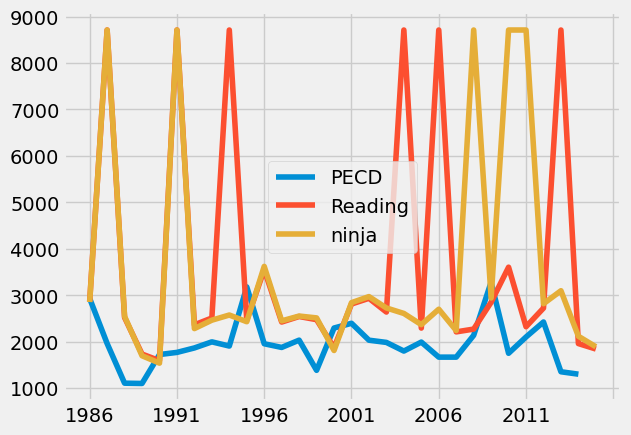

In [70]:
LOLE.loc['PECD']['NO'].plot(label='PECD')
LOLE.loc['Reading']['NO'].plot(label='Reading')
LOLE.loc['ninja']['NO'].plot(label='ninja')
plt.legend()
#plt.ylim(0,1500)

In [19]:
network = pypsa.Network('../networks/pilot_elec-vre-hydro_TY2030_2009.nc')

INFO:pypsa.io:Imported network pilot_elec-vre-hydro_TY2030_2009.nc has buses, carriers, generators, links, loads, stores


In [6]:
df = network.links_t.mu_upper.round(4)
df.loc[:, (df != df.iloc[0]).any()].sum().sort_values().head(20)

Link
FR00 CLPHS store      -6.403664e+06
NOS0 OLPHS dispatch   -2.181683e+06
NON1 OLPHS dispatch   -2.181683e+06
NOM1 OLPHS dispatch   -2.181683e+06
NL00-NOS0 HVDC        -1.923561e+06
UK00-NOS0 HVDC        -1.888634e+06
SE02-NON1 HVAC        -1.845670e+06
SE02-NOM1 HVAC        -1.845670e+06
SE03-NOS0 HVAC        -1.845670e+06
SE01-NON1 HVAC        -1.845670e+06
DE00-NOS0 HVDC        -1.716364e+06
DKW1-NOS0 HVDC        -1.650990e+06
AT00 OLPHS store      -4.789379e+05
PLE0-DE00 HVAC        -4.527202e+05
ITN1-AT00 HVAC        -4.122055e+05
HU00-AT00 HVAC        -4.096696e+05
SI00-AT00 HVAC        -4.096696e+05
AT00 hydro dispatch   -4.025006e+05
ITN1-CH00 HVAC        -4.005435e+05
FR00-DE00 HVAC        -3.973050e+05
dtype: float64

In [20]:
limits = pd.read_csv('../../resources/climatic/PECD/TY2030/hydro_uniform_Maximum Generated energy MWh per week.csv', header=0)

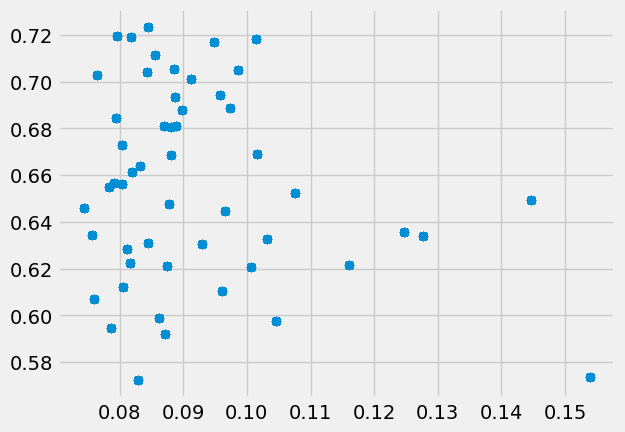

In [23]:
test = limits['NON1 - Pump Storage Open Loop'] / 6690.7145

plt.scatter(network.links_t.p_max_pu['NON1 OLPHS dispatch'], test)

In [13]:
network.links.p_nom['NON1 OLPHS dispatch']

6690.714500000001

In [7]:
network.links_t.p_max_pu.mul(network.links.p_nom)['NON1 OLPHS dispatch']#.resample('7D').sum()

#network.links_t.p_max_pu['NON1 OLPHS dispatch']

snapshot
2009-01-01 00:00:00    593.040133
2009-01-01 01:00:00    593.040133
2009-01-01 02:00:00    593.040133
2009-01-01 03:00:00    593.040133
2009-01-01 04:00:00    593.040133
                          ...    
2009-12-31 19:00:00     89.282158
2009-12-31 20:00:00     89.282158
2009-12-31 21:00:00     89.282158
2009-12-31 22:00:00     89.282158
2009-12-31 23:00:00     89.282158
Name: NON1 OLPHS dispatch, Length: 8760, dtype: float64